
### Simple Linear Regression 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('Assignment-1_Diamond_price.csv')

In [ ]:
data.head()


,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


In [ ]:
x= data[['carat']]
y= data['price']

In [ ]:
x.shape

(53940, 1)

In [ ]:
y.shape

(53940,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y)


In [ ]:
x_train.shape

(40455, 1)

In [ ]:
y_train.shape

(40455,)

In [ ]:
x_test.shape

(13485, 1)

In [ ]:
y_train.shape

(40455,)

In [ ]:
y_test.shape

(13485,)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions=lr.predict(x_test)
Y_pred = lr.predict(x_train)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# y_true = [3]
y_pred=lr.predict(x_test)
r2_score=(y_pred, y_test)

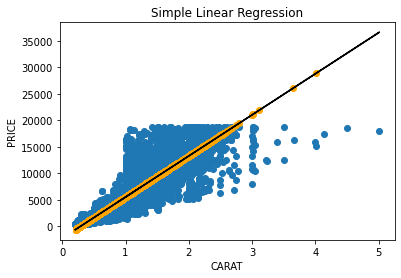

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, Y_pred, color='black')
plt.scatter(x_test, predictions, color='orange')
plt.title('Simple Linear Regression')
plt.xlabel('CARAT')
plt.ylabel('PRICE')
plt.show()

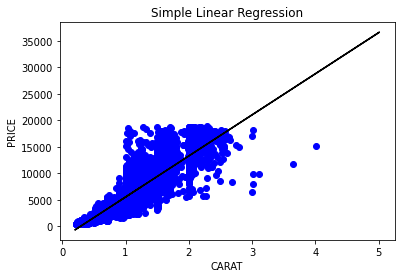

In [ ]:
plt.plot(x_train, Y_pred, color='black')
plt.scatter(x_test, y_test, color='blue')
plt.title('Simple Linear Regression')
plt.xlabel('CARAT')
plt.ylabel('PRICE')
plt.show()

## Polynomial Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Assignment-1_Diamond_price.csv')
data.head(10)

x = data[['carat']]
y = data['price']

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_preds= lin_reg.predict(x)

In [ ]:
from sklearn.preprocessing import  PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(x)
#poly_reg.fit(x_poly,y)
print(x_poly)

[[1.00000000e+00 2.30000000e-01 5.29000000e-02 1.21670000e-02
  2.79841000e-03 6.43634300e-04]
 [1.00000000e+00 2.10000000e-01 4.41000000e-02 9.26100000e-03
  1.94481000e-03 4.08410100e-04]
 [1.00000000e+00 2.30000000e-01 5.29000000e-02 1.21670000e-02
  2.79841000e-03 6.43634300e-04]
 ...
 [1.00000000e+00 7.00000000e-01 4.90000000e-01 3.43000000e-01
  2.40100000e-01 1.68070000e-01]
 [1.00000000e+00 8.60000000e-01 7.39600000e-01 6.36056000e-01
  5.47008160e-01 4.70427018e-01]
 [1.00000000e+00 7.50000000e-01 5.62500000e-01 4.21875000e-01
  3.16406250e-01 2.37304688e-01]]


In [ ]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts=train_test_split(x_poly,y, test_size=0.25, random_state=0)

In [ ]:
lin_reg_2 = LinearRegression()
model=lin_reg_2.fit(xtr, ytr)
lin_reg_2.fit(xtr,ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#poly_preds=model.predict(xts)
y_pred_poly = lin_reg_2.predict(xts)

In [ ]:
print(model.intercept_)
print(model.coef_)
#from sklearn.metrics import r2_score
#r2_score(yts,poly_preds)*100

1012.6232011320394
[    0.         -4070.55631    10877.74512079 -2549.12323664
  -280.3126183     84.67917628]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred_poly,yts)*100

85.09930152739382

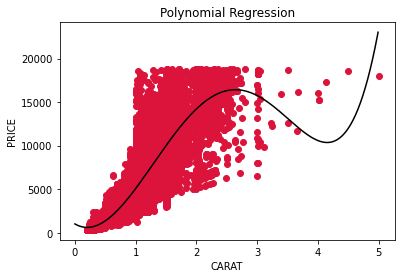

In [ ]:
plt.scatter(x, y, color = 'crimson')
x_grid=np.arange(0,5, 0.01)
x_grid=x_grid.reshape(len(x_grid),1)
plt.plot(x_grid,lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color='black')
plt.title('Polynomial Regression')
plt.xlabel('CARAT')
plt.ylabel('PRICE')
plt.show()
